In [1]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

### Task 1

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


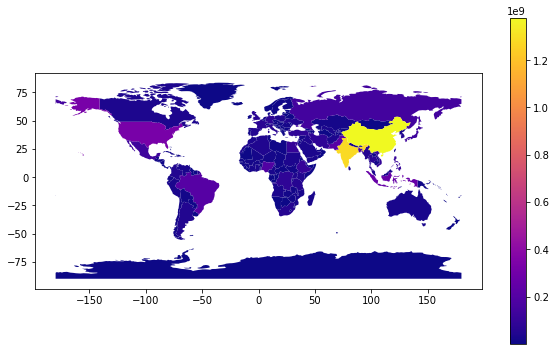

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(column='pop_est', legend=True, ax=ax, cmap='plasma')
plt.show()

### Task 2

In [5]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [65]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    fig, ax = plt.subplots(figsize=(16, 9))
    plt.imshow(logheatmap, cmap=cmap, extent=extent, aspect='auto')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/tmp/ipykernel_19770/1754419949.py:13: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)


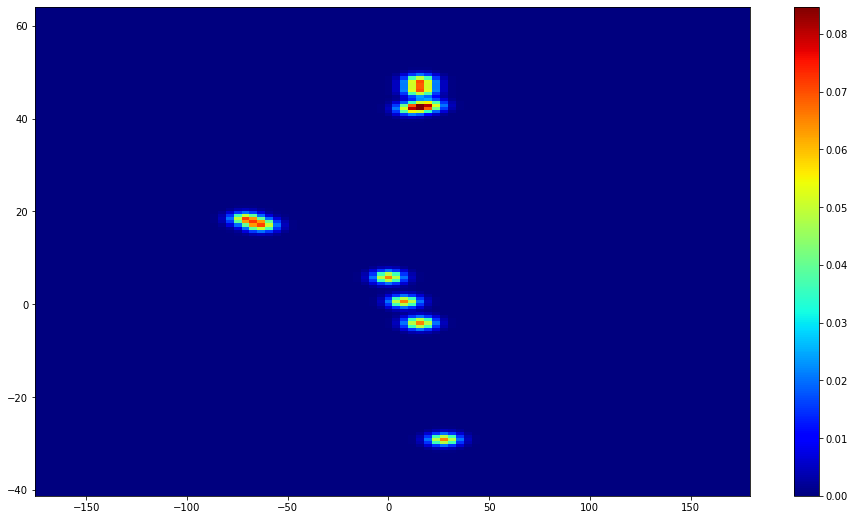

In [66]:
ax = heatmap(cities, (160, 90))
plt.show()

In [8]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
Polygon([(2,2), (4,2), (4,4), (2,4)])])
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
Polygon([(3,3), (5,3), (5,5), (3,5)])])
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

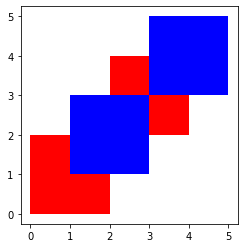

In [115]:
fig, ax = plt.subplots(figsize=(10, 4))
df1.plot(ax=ax, color='red', label="df1")
df2.plot(ax=ax, color='blue', label="df2")
plt.show()


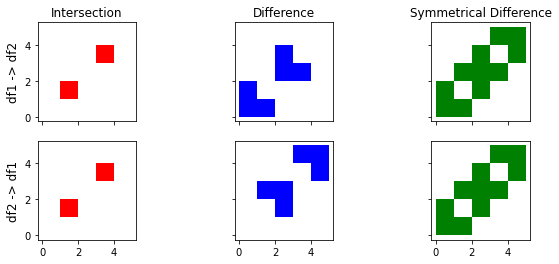

In [97]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 4), sharex=True, sharey=True)
df1.intersection(df2).plot(ax=axes[0, 0], color="red")
axes[0,0].set_title("Intersection")
axes[0,0].set_ylabel('df1 -> df2', fontsize=12)

df1.difference(df2).plot(ax=axes[0, 1], color="blue")
axes[0,1].set_title("Difference")

df1.symmetric_difference(df2).plot(ax=axes[0, 2], color="green")
axes[0,2].set_title("Symmetrical Difference")


df2.intersection(df1).plot(ax=axes[1, 0], color="red")
axes[1,0].set_ylabel('df2 -> df1', fontsize=12)

df2.difference(df1).plot(ax=axes[1, 1], color="blue")
df2.symmetric_difference(df1).plot(ax=axes[1,2], color="green")

plt.show()